In [1]:
#!pip install seaborn
#!pip install nltk
#!pip install wordcloud
#!pip install vaderSentiment
#!pip install scikit-learn
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

# Set color palette for Seaborn
colors = ["#26536f", "#3b96b7", "#749ca8", "#b6a98d", "#c78a4d", "#854927"]
sns.set_palette(colors)


In [4]:
# Text Processing Libraries
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk import ngrams


In [5]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
#Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# catboost import CatBoostClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [7]:
df=pd.read_csv('sample_data/Womens Clothing E-Commerce.csv')

In [8]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,General,Tops,Blouses


In [9]:
df.shape

(23486, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       23486 non-null  int64 
 1   Clothing ID      23486 non-null  int64 
 2   Age              23486 non-null  int64 
 3   Title            19676 non-null  object
 4   Review Text      22641 non-null  object
 5   Division Name    23472 non-null  object
 6   Department Name  23472 non-null  object
 7   Class Name       23472 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.4+ MB


In [11]:
df.isna().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Division Name,14
Department Name,14
Class Name,14


In [12]:
print('Min Age :',df['Age'].min())
print('Max Age :',df['Age'].max())


Min Age : 18
Max Age : 99


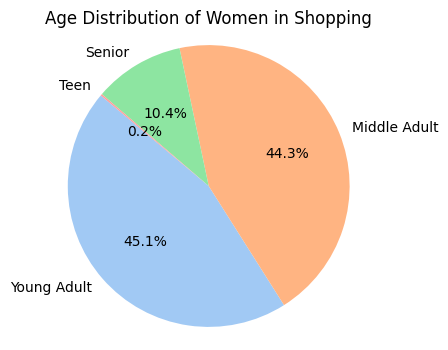

In [13]:

# Create age categories
bins = [ 0,19, 39, 60, 99]
labels = [ 'Teen','Young Adult', 'Middle Adult', 'Senior']
df['Age Category'] = pd.cut(df['Age'], bins, labels=labels)

# Count the number of occurrences for each category
age_counts = df['Age Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(4,4 ))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Age Distribution of Women in Shopping')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



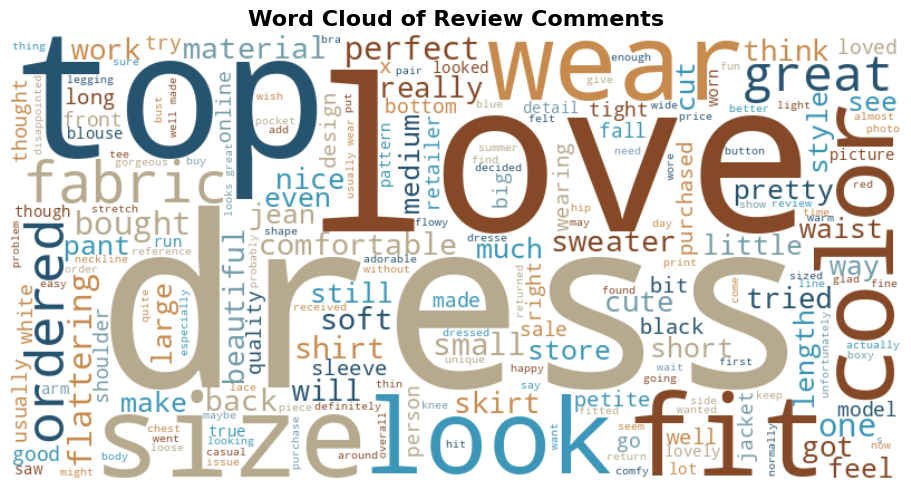

In [14]:
# Define a color function
def color_func(word, font_size, position, orientation, random_state=42, **kwargs):
    return random.choice(colors)

# Example: Word cloud from review comments
plt.figure(figsize=(10, 5))

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(' '.join(df['Review Text'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Review Comments', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#854927; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> Natural Language Processing (NLP)</b></div>

In [15]:
nlp_df=df[['Title','Review Text','Class Name']]

In [16]:
nlp_df

,Title,Review Text,Class Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,Intimates
1,NaN,Love this dress! it's sooo pretty. i happene...,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,Blouses
...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",Knits
23483,"Cute, but see through","This fit well, but the top was very see throug...",Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,Dresses


In [17]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        19676 non-null  object
 1   Review Text  22641 non-null  object
 2   Class Name   23472 non-null  object
dtypes: object(3)
memory usage: 550.6+ KB


In [18]:
print(f"There are {nlp_df['Class Name'].nunique()} product categories  in the Data set \n {nlp_df['Class Name'].unique()}")


There are 20 product categories  in the Data set 
 ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


In [19]:
# Calculating the total number of NaN values in each column of the DataFrame 'nlp_df'
nan_counts = nlp_df.isna().sum()
nan_counts

,0
Title,3810
Review Text,845
Class Name,14


In [20]:
# Calculating the total number of NaN values in the 'review_comment_message' column of 'nlp_df'
nan_count_review_comment_message = nlp_df['Review Text'].isna().sum()
print(nan_count_review_comment_message)

845


In [21]:
def remove_dup_nlp_df(nlp_df, column_name='Review Text'):

    #remove duplicates
    nlp_df=nlp_df.drop_duplicates(subset=[column_name],keep='first' )
    # Display the total entries after removing duplicates
    print(f"Total entries after removing duplicates in '{column_name}': {nlp_df.shape[0]}")
    return nlp_df

nlp_df = remove_dup_nlp_df(nlp_df, 'Review Text')
nlp_df.head()



Total entries after removing duplicates in 'Review Text': 22635


,Title,Review Text,Class Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,Intimates
1,NaN,Love this dress! it's sooo pretty. i happene...,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,Blouses


In [22]:
def clean_reviews(df):

    # Remove rows where 'review_comment_message' is empty
    df = df.dropna(subset=['Title','Review Text','Class Name']).reset_index(drop=True)

    # Remove duplicate rows
    df = df.drop_duplicates(subset=['Review Text'])

    return df

# Assuming 'nlp_df' is your dataframe
df_cleaned = clean_reviews(nlp_df)

# Display the first records to check
df_cleaned.head()

,Title,Review Text,Class Name
0,Some major design flaws,I had such high hopes for this dress and reall...,Dresses
1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",Pants
2,Flattering shirt,This shirt is very flattering to all due to th...,Blouses
3,Not for the very petite,"I love tracy reese dresses, but this one is no...",Dresses
4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,Knits


# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#854927; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> Text Preprocessing </b></div>

In [23]:
# Define Portuguese stopwords
STOP_WORDS = set(stopwords.words('english'))

# Helper function to clean and tokenize text
def clean_and_tokenize(text):
    # Ensure the text is a string
    if not isinstance(text, str):
        return "", []

    # Convert to lowercase, remove punctuation, and split into words
    cleaned_text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = cleaned_text.split()

    # Remove stopwords and create tokens
    filtered_words = [word for word in words if word not in STOP_WORDS]
    return " ".join(filtered_words), filtered_words

# Main function to preprocess and clean the dataframe
def preprocess_nlp_df(df):
    # Clean, remove stopwords, and tokenize comments
    df[['Review Text clean', 'Review Text tokens']] = df['Review Text'].apply(
        lambda text: pd.Series(clean_and_tokenize(text))
    )

    # Remove rows with NaN values in key columns
    df.dropna(subset=['Title', 'Review Text'], inplace=True)

    # Drop duplicate rows based on the 'review_comment_message' and 'review_comment_title' columns
    df.drop_duplicates(subset=['Review Text', 'Title'], inplace=True)

    return df.reset_index(drop=True)

# Preprocess the dataset
nlp_df = preprocess_nlp_df(nlp_df)

# Display the first records to check
nlp_df[['Review Text', 'Review Text clean', 'Review Text tokens']].head()

<ipython-input-23-885d31dc77bb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Review Text clean', 'Review Text tokens']] = df['Review Text'].apply(
<ipython-input-23-885d31dc77bb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Review Text clean', 'Review Text tokens']] = df['Review Text'].apply(
<ipython-input-23-885d31dc77bb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Review Text,Review Text clean,Review Text tokens
0,I had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,"[high, hopes, dress, really, wanted, work, ini..."
1,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,"[love, love, love, jumpsuit, fun, flirty, fabu..."
2,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,"[shirt, flattering, due, adjustable, front, ti..."
3,"I love tracy reese dresses, but this one is no...",love tracy reese dresses one petite 5 feet tal...,"[love, tracy, reese, dresses, one, petite, 5, ..."
4,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...,"[aded, basket, hte, last, mintue, see, would, ..."


In [24]:
# Initialize the Sentiment Analyzer once
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(df, column_name='Review Text clean'):
    # Vectorized function to get sentiment classification
    def get_sentiment_classification(text):
        scores = analyzer.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 'Positive'
        elif scores['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    # Apply sentiment analysis using map for faster iteration
    df[f'{column_name}_sentiment'] = df[column_name].map(get_sentiment_classification)
    return df

# Classify sentiment in 'nlp_df' based on the 'review_comment_message_clean' column
nlp_df = classify_sentiment(nlp_df, 'Review Text clean')

# Display the sentiment results
nlp_df[['Review Text clean', 'Review Text clean_sentiment']].head()

,Review Text clean,Review Text clean_sentiment
0,high hopes dress really wanted work initially ...,Positive
1,love love love jumpsuit fun flirty fabulous ev...,Positive
2,shirt flattering due adjustable front tie perf...,Positive
3,love tracy reese dresses one petite 5 feet tal...,Positive
4,aded basket hte last mintue see would look lik...,Positive


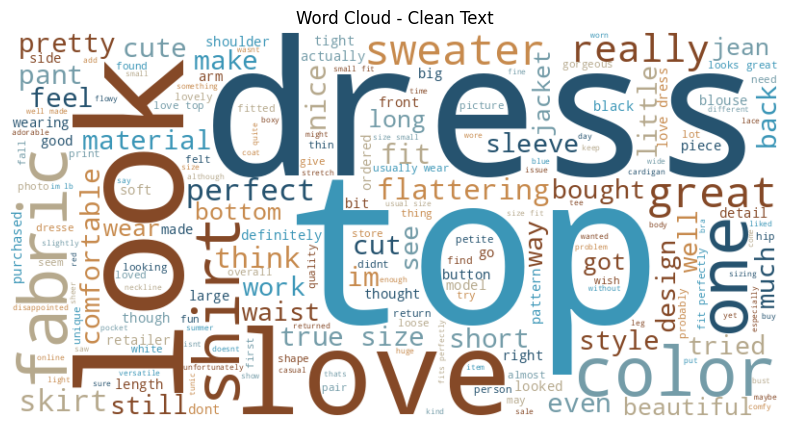

In [25]:
# Concatenate all non-null texts from the 'cleaned_text' column into a single string
text_combined = " ".join(nlp_df['Review Text clean'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud - Clean Text")
plt.axis("off")  # Remove the axes
plt.show()

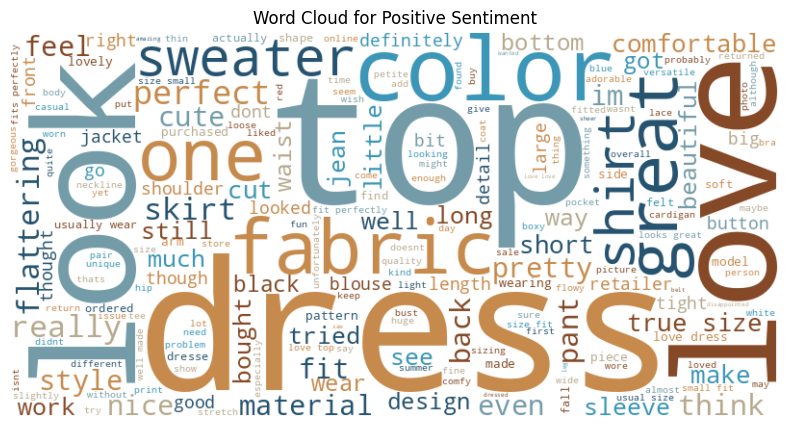

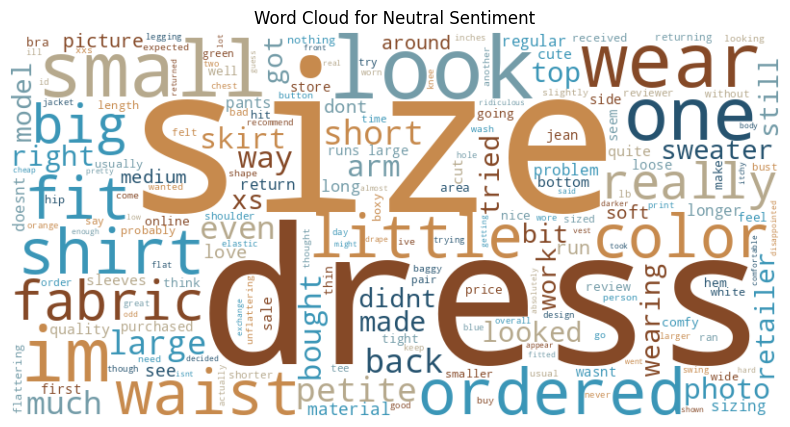

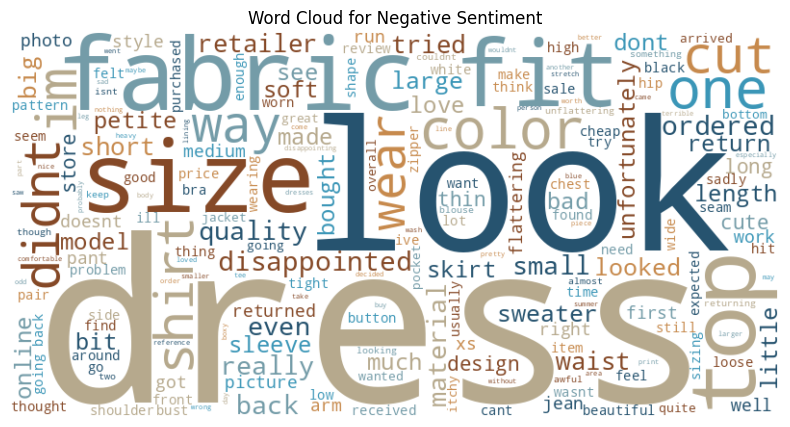

In [26]:
def plot_word_clouds_by_sentiment(df, text_column='Review Text clean', sentiment_column='Review Text clean_sentiment'):
    # Filter text by sentiment
    sentiments = ['Positive', 'Neutral', 'Negative']

    for sentiment in sentiments:
        # Filter data by current sentiment
        text_data = " ".join(df[df[sentiment_column] == sentiment][text_column].dropna())

        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_data)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment} Sentiment')
        plt.show()

# Generate word clouds based on sentiment for the specified columns
plot_word_clouds_by_sentiment(nlp_df, 'Review Text clean', 'Review Text clean_sentiment')

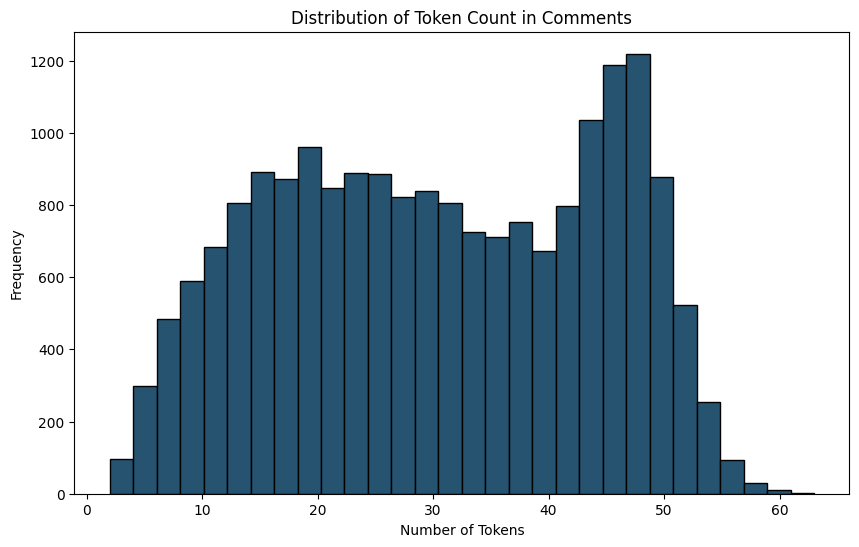

In [27]:
def plot_token_count_distribution(df, token_column='Review Text tokens'):
    # Calculate the number of tokens for each entry
    df['token_count'] = df[token_column].apply(len)

    # Plot the distribution of token counts
    plt.figure(figsize=(10, 6))
    plt.hist(df['token_count'], bins=30, edgecolor='black')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.title('Distribution of Token Count in Comments')
    plt.show()

# Generate the token count distribution plot
plot_token_count_distribution(nlp_df, 'Review Text tokens')

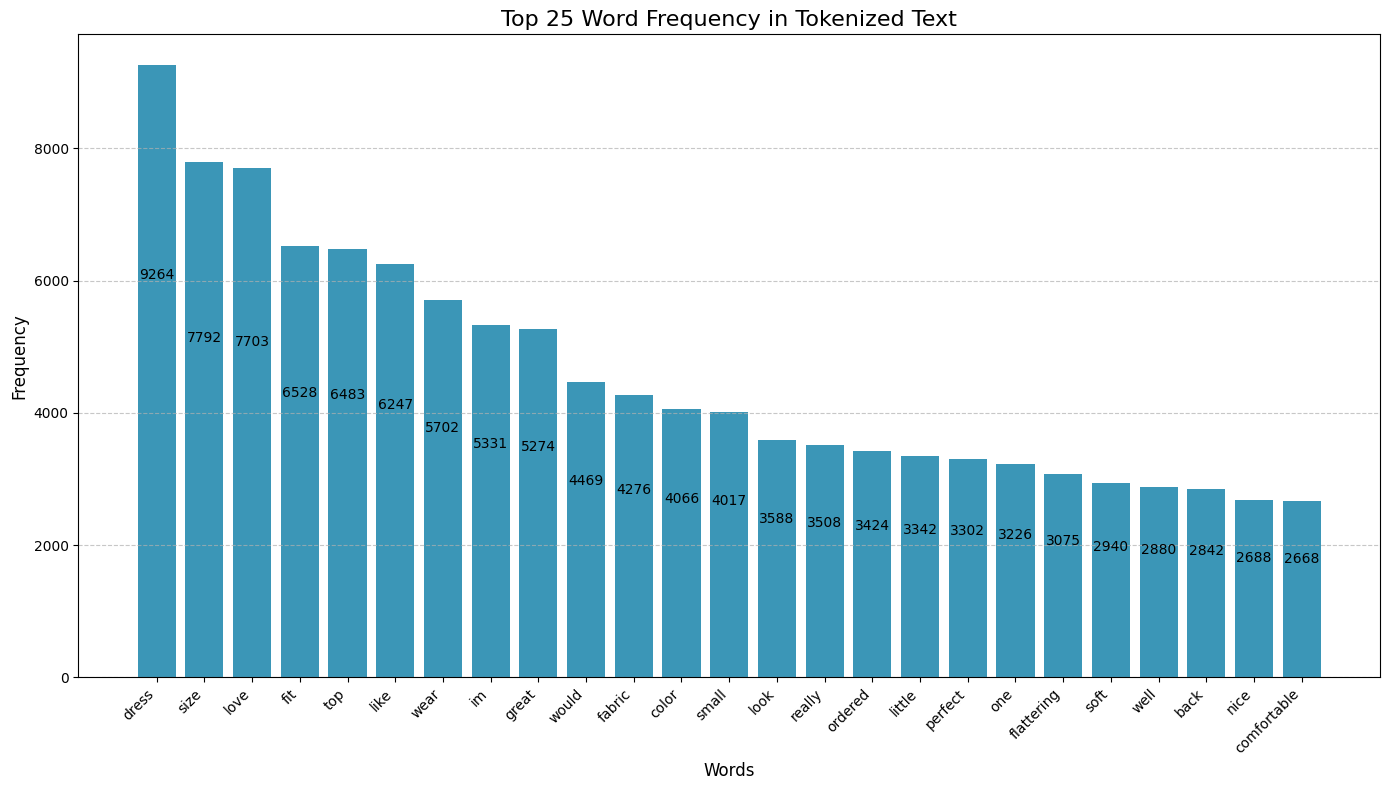

In [28]:
# Function to get top N tokens or n-grams
def get_top_tokens(df, token_column='Review text tokens', top_n=50):
    all_tokens = [token for tokens in df[token_column] for token in tokens]
    token_counts = Counter(all_tokens)
    return token_counts.most_common(top_n)

# Function to create a DataFrame from frequency counts
def create_frequency_df(counter, columns=['Word', 'Frequency']):
    return pd.DataFrame(counter.items(), columns=columns)

# General plotting function for bar charts
def plot_top_frequencies(df, title, xlabel, column_name):
    plt.figure(figsize=(14, 8))
    bars = plt.bar(df[column_name], df['Frequency'], color=colors[1])

    # Add labels
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.35),
                 f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

    # Customize and show plot
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Get top tokens and plot
top_50_tokens = get_top_tokens(nlp_df, 'Review Text tokens', 50)
top_50_tokens_df = create_frequency_df(dict(top_50_tokens))
plot_top_frequencies(top_50_tokens_df.head(25), 'Top 25 Word Frequency in Tokenized Text', 'Words', 'Word')

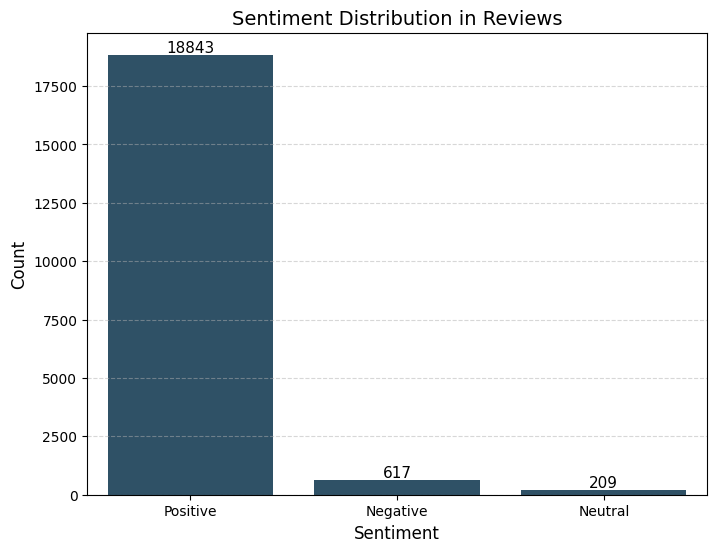

In [29]:
# Plot the sentiment count
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Review Text clean_sentiment", data=nlp_df)

# Add labels and title
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Sentiment Distribution in Reviews", fontsize=14)

# Display value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Reduce gridline visibility for a cleaner look
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.5)

plt.show()

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#854927; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> Data Preprocessing</b></div>

### Separate Features and Labels

In [30]:
label_encoder = LabelEncoder()

X = nlp_df['Review Text clean'].to_list() # Text column
# Convert categorical classes
y = nlp_df['Review Text clean_sentiment'].to_list()


y1 = label_encoder.fit_transform(y)

# Check if the conversion was successful
print(f"Unique values in y_train_encoded after encoding: {y1}")
 # Target column
print(len(X))
print(len(y))

Unique values in y_train_encoded after encoding: [2 2 2 ... 2 2 2]
19669
19669


### Train / Test Split

In [31]:
### Feature Encoding

# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:110%; font-family:Arial, sans-serif; background-color:#854927; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> BERT (Bidirectional Encoder Representations from Transformers)</b></div>

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X,y1,test_size=0.2, random_state=42)
#print(X_train.count())

In [34]:
# Install required libraries
# pip install transformers datasets torch scikit-learn

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import torch

# Assuming X (text data) and y (labels) are already prepared as lists or arrays
# Example: X = ["Sample text 1", "Sample text 2"], y = [0, 1]

# Step 1: Define Dataset Class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Step 2: Prepare Tokenizer and Model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y)))

# Step 3: Split Data and Create Dataset Objects

train_dataset = TextDataset(X_train, y_train, tokenizer, max_length=128)
val_dataset = TextDataset(X_val, y_val, tokenizer, max_length=128)

# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",          # Directory to save model
    num_train_epochs=3,              # Number of epochs
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    evaluation_strategy="epoch",     # Evaluate every epoch
    save_strategy="epoch",           # Save model every epoch
    logging_dir="./logs",            # Log directory
    learning_rate=2e-5,              # Learning rate
    load_best_model_at_end=True,     # Load the best model at the end
)

# Step 5: Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Step 6: Train the Model
trainer.train()

# Step 7: Evaluate the Model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Optional: Save the model
trainer.save_model("./bert-finetuned")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-34-cb192934b911>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.183700,0.134810
2,0.088600,0.142956
3,0.045900,0.154931


Evaluation Results: {'eval_loss': 0.13481032848358154, 'eval_runtime': 29.8361, 'eval_samples_per_second': 131.854, 'eval_steps_per_second': 8.245, 'epoch': 3.0}


In [36]:
from sklearn.metrics import classification_report

# Get predictions
preds = trainer.predict(val_dataset)
pred_labels = torch.argmax(torch.tensor(preds.predictions), axis=1).numpy()

# Generate report
print(classification_report(y_val, pred_labels, target_names=["Negative", "Neutral", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.79      0.26      0.39       132
     Neutral       0.78      0.16      0.26        45
    Positive       0.97      1.00      0.98      3757

    accuracy                           0.96      3934
   macro avg       0.84      0.47      0.54      3934
weighted avg       0.96      0.96      0.95      3934



In [43]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load saved model and tokenizer
tokenizer = BertTokenizer.from_pretrained("./sentiment_model")
model = BertForSequenceClassification.from_pretrained("./sentiment_model")

# Sentiment prediction function
def predict_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted class
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    # Map class to sentiment
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[predicted_class]

# Example usage
review = "The product quality is good! Absolutely love it."
print(f"Sentiment: {predict_sentiment(review)}")


Sentiment: Positive
